# **EXTRACCION**


In [2]:
import pandas as pd
datos = pd.read_json('TelecomX_Data.json')
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


# **Transformacion**

In [3]:
from pandas import json_normalize
df_customer = json_normalize(datos['customer'])
df_phone = json_normalize(datos['phone'])
df_internet = json_normalize(datos['internet'])
df_account = json_normalize(datos['account'])

# Unir con el DataFrame original
df_final = pd.concat([datos.drop(columns=['customer', 'phone', 'internet', 'account']), df_customer, df_phone, df_internet, df_account], axis=1)
datos = df_final
pd.unique(datos['gender'])
datos.columns = datos.columns.str.lower().str.replace(' ', '_')
datos.head()

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges.monthly,charges.total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [4]:
import numpy as np
datos['churn'] = datos['churn'].replace(
    ['', ' ', '  ', 'NA', 'N/A', 'None', 'null'], np.nan)
datos.dropna(subset=['churn'], inplace=True)
datos['charges.total'] = pd.to_numeric(datos['charges.total'], errors='coerce')
datos['charges.total'].fillna(datos['charges.total'].median(), inplace=True)

/tmp/ipython-input-1784047145.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datos['charges.total'].fillna(datos['charges.total'].median(), inplace=True)


In [5]:
datos['partner'] =datos['partner'].replace({'Yes': 1, 'No': 0})
datos['churn']=datos['churn'].replace({'Yes': 1, 'No': 0})
datos['dependents'] =datos['dependents'].replace({'Yes': 1, 'No': 0})
datos['phoneservice'] =datos['phoneservice'].replace({'Yes': 1, 'No': 0})
datos['multiplelines'] =datos['multiplelines'].replace({'Yes': 1, 'No': 0, 'No phone service': 0})
datos['onlinesecurity'] =datos['onlinesecurity'].replace({'Yes': 1, 'No': 0, 'No internet service': 0})
datos['onlinebackup'] =datos['onlinebackup'].replace({'Yes': 1, 'No': 0, 'No internet service': 0})
datos['deviceprotection'] =datos['deviceprotection'].replace({'Yes': 1, 'No': 0, 'No internet service': 0})
datos['techsupport'] =datos['techsupport'].replace({'Yes': 1, 'No': 0, 'No internet service': 0})
datos['paperlessbilling'] =datos['paperlessbilling'].replace({'Yes': 1, 'No': 0})
datos['gender'] =datos['gender'].replace({'Female': 1, 'Male': 0})
datos['streamingmovies']=datos['streamingmovies'].replace({'Yes': 1, 'No': 0, 'No internet service': 0})
datos['streamingtv']=datos['streamingtv'].replace({'Yes': 1, 'No': 0, 'No internet service': 0})

/tmp/ipython-input-289805352.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos['partner'] =datos['partner'].replace({'Yes': 1, 'No': 0})
/tmp/ipython-input-289805352.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos['churn']=datos['churn'].replace({'Yes': 1, 'No': 0})
/tmp/ipython-input-289805352.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior

Eliminar columnas irrelevanrtes

In [6]:
datos = datos.drop(['customerid'], axis=1)
datos.head()

,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges.monthly,charges.total
0,0,1,0,1,1,9,1,0,DSL,0,1,0,1,1,0,One year,1,Mailed check,65.6,593.30
1,0,0,0,0,0,9,1,1,DSL,0,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40
2,1,0,0,0,0,4,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85
3,1,0,1,1,0,13,1,0,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85
4,1,1,1,1,0,3,1,0,Fiber optic,0,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40


In [7]:
x = datos.drop(['churn'], axis=1)
y = datos['churn']

# **Encoding**


In [8]:
#Se van a transformar las variables para que no causen un peso mayor con la codificacion
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
columnas = x.columns
one_hot_encoder = make_column_transformer((OneHotEncoder(drop = 'if_binary'),['internetservice','contract', 'paymentmethod']),
                                      remainder='passthrough', sparse_threshold=0,
                                          force_int_remainder_cols=False)


In [9]:
x = one_hot_encoder.fit_transform(x)
new_columns = one_hot_encoder.get_feature_names_out()
x = pd.DataFrame(x, columns=new_columns)
x.head()

,onehotencoder__internetservice_DSL,onehotencoder__internetservice_Fiber optic,onehotencoder__internetservice_No,onehotencoder__contract_Month-to-month,onehotencoder__contract_One year,onehotencoder__contract_Two year,onehotencoder__paymentmethod_Bank transfer (automatic),onehotencoder__paymentmethod_Credit card (automatic),onehotencoder__paymentmethod_Electronic check,onehotencoder__paymentmethod_Mailed check,...,remainder__multiplelines,remainder__onlinesecurity,remainder__onlinebackup,remainder__deviceprotection,remainder__techsupport,remainder__streamingtv,remainder__streamingmovies,remainder__paperlessbilling,remainder__charges.monthly,remainder__charges.total
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,65.6,593.30
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,59.9,542.40
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,73.9,280.85
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,98.0,1237.85
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,83.9,267.40


# **ANALISIS DE CORRELACIONES**

In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y

array([0, 0, 1, ..., 0, 0, 0])

In [11]:
y_series = pd.Series(y)
print(y_series.value_counts())

0    5174
1    1869
Name: count, dtype: int64


In [12]:
correlacion = ['charges.monthly', 'charges.total', 'tenure', 'churn']
corr = datos[correlacion].copy()
corr.corr()

,charges.monthly,charges.total,tenure,churn
charges.monthly,1.000000,0.650864,0.247900,0.193356
charges.total,0.650864,1.000000,0.825464,-0.199037
tenure,0.247900,0.825464,1.000000,-0.352229
churn,0.193356,-0.199037,-0.352229,1.000000


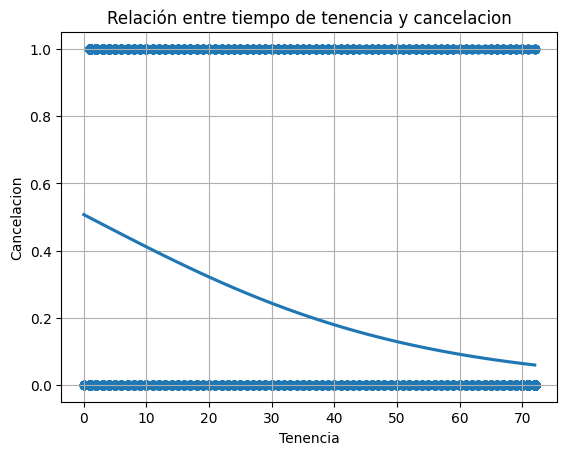

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(data=datos, x='tenure', y='churn', logistic=True, ci=None)
plt.title('Relación entre tiempo de tenencia y cancelacion')
plt.xlabel('Tenencia')
plt.ylabel('Cancelacion')
plt.grid(True)
plt.show()

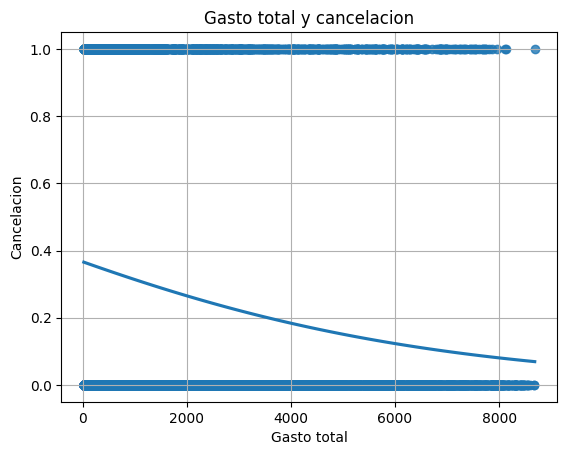

In [14]:
sns.regplot(data=datos, x='charges.total', y='churn', logistic=True, ci=None)
plt.title('Gasto total y cancelacion')
plt.xlabel('Gasto total')
plt.ylabel('Cancelacion')
plt.grid(True)
plt.show()

# **MODELOS**

In [15]:
#Primer modelo
from sklearn.tree import DecisionTreeClassifier
modelo = DecisionTreeClassifier()
modelo.fit(x, y)
modelo.score(x,y)

0.9974442709072838

In [16]:
from sklearn.model_selection import train_test_split
x, x_test, y, y_test = train_test_split(x, y, test_size=0.30, stratify =y, random_state=5)
x_train, x_val, y_train, y_val = train_test_split(x, y, stratify =y, random_state=5)


# **Modelo de arbol de decision**

In [17]:
#Primer modelo
from sklearn.tree import DecisionTreeClassifier
modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(x_train, y_train)
print(f'La exactitud del modelo es de entrenamiento {modelo.score(x_train,y_train)}')
print(f'La exactitud del modelo es de validacion {modelo.score(x_val,y_val)}')

La exactitud del modelo es de entrenamiento 0.8888287800919664
La exactitud del modelo es de validacion 0.7639902676399026


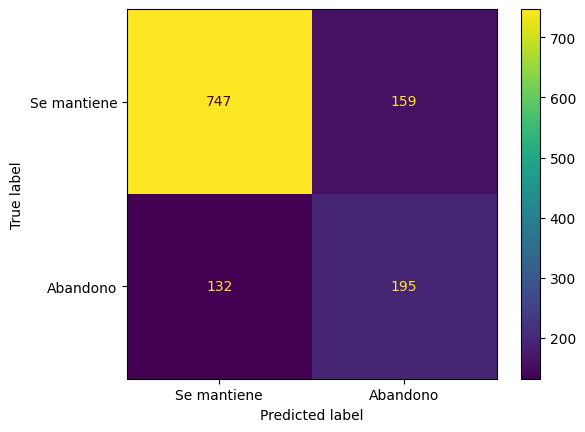

In [18]:
#Evaluando el modelo
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = modelo.predict(x_val)
cm = confusion_matrix(y_val, y_pred)
from sklearn.metrics import ConfusionMatrixDisplay
visualizacion = ConfusionMatrixDisplay(cm, display_labels={'Se mantiene', 'Abandono'})
visualizacion.plot()
plt.show()

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(f'Accuracy: {accuracy_score(y_val, y_pred)}')
print(f'Precision: {precision_score(y_val, y_pred)}')
print(f'Recall: {recall_score(y_val, y_pred)}')
print(f'F1 Score: {f1_score(y_val, y_pred)}')

Accuracy: 0.7639902676399026
Precision: 0.5508474576271186
Recall: 0.5963302752293578
F1 Score: 0.5726872246696035


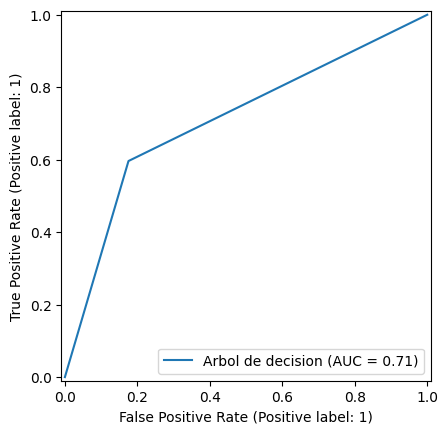

In [20]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_val, y_pred, name = 'Arbol de decision')

In [21]:
from sklearn.model_selection import KFold, cross_validate
kf = KFold(n_splits=5, shuffle=True,random_state=5)
cv_resultados =cross_validate(modelo,x,y,cv=kf)
cv_resultados
cv_resultados['test_score']
promedio = cv_resultados['test_score'].mean()
desvio_std = cv_resultados['test_score'].std()
print(f'El promedio de la exactitud es de: {promedio}')
print(f'El desvío típico es de: {desvio_std}')
print(f'El intervalo de confianza es: [{promedio-2*desvio_std},{min(promedio+2*desvio_std,1)}]')


El promedio de la exactitud es de: 0.7529411764705882
El desvío típico es de: 0.01702646147783638
El intervalo de confianza es: [0.7188882535149155,0.786994099426261]


In [22]:
def intervalo_confianza(resultados):
  promedio = resultados['test_score'].mean()
  desvio_std = resultados['test_score'].std()
  return f'El intervalo de confianza es: [{promedio-2*desvio_std},{min(promedio+2*desvio_std,1)}]'

In [23]:
##Balanceo de datos
#Oversampling
from imblearn.over_sampling import SMOTE
oversampling = SMOTE()
x_balanceada, y_balanceada = oversampling.fit_resample(x, y)
pd.Series(y_balanceada).value_counts()

,count
0,3622
1,3622


In [24]:
##Pipeline para validacion
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.model_selection import StratifiedKFold, cross_validate
modelo = DecisionTreeClassifier(max_depth=10)
pipeline = imbpipeline([('oversampling', SMOTE()), ('arbol', modelo)])
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(pipeline, x, y, cv=skf)
intervalo_confianza(cv_resultados)


'El intervalo de confianza es: [0.7079211857555856,0.8064804369624674]'

In [25]:
##Balanceo de datos
##Undersampling
from imblearn.under_sampling import NearMiss
modelo = DecisionTreeClassifier(max_depth=10)
undersampling = NearMiss()
pipeline = imbpipeline([('undersampling', undersampling), ('arbol', modelo)])
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(pipeline, x, y, cv=skf)
intervalo_confianza(cv_resultados)
##Este modelo es deficiente

'El intervalo de confianza es: [0.4828827667753542,0.5159001946850919]'

# **Modelo de KNN**

In [26]:
##Modelo KNN
from sklearn.preprocessing import MinMaxScaler
normalizacion = MinMaxScaler()
x_train_normalizado = normalizacion.fit_transform(x_train)
x_val_normalizado = normalizacion.fit_transform(x_val)
pd.DataFrame(x_train_normalizado).head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.279522,0.071608
1,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.798206,0.797436
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.371699,0.159983
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010962,0.033505
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.557549,0.013986


NUEVO MODELO KNN

In [27]:

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train_normalizado, y_train)
x_test_normalizado = normalizacion.transform(x_test)
knn.score(x_test_normalizado, y_test)
y_pred_norm = knn.predict(x_test)
knn.score(x_test_normalizado, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


0.7780407004259347

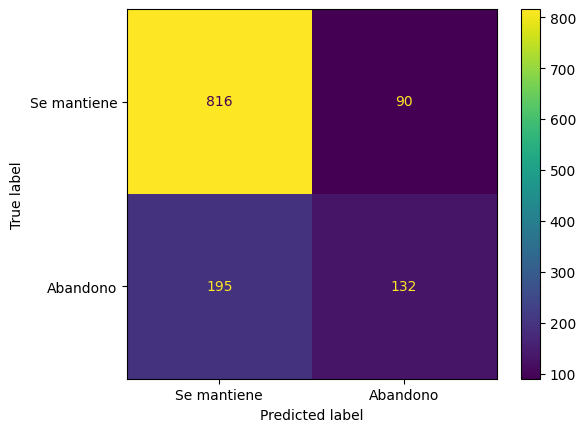

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred_norm = knn.predict(x_val_normalizado)
cm = confusion_matrix(y_val, y_pred_norm)
from sklearn.metrics import ConfusionMatrixDisplay
visualizacion = ConfusionMatrixDisplay(cm, display_labels={'Se mantiene', 'Abandono'})
visualizacion.plot()
plt.show()

In [29]:
#Evaluando metricas del modelo
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(f'Accuracy: {accuracy_score(y_val, y_pred_norm)}')
print(f'Precision: {precision_score(y_val, y_pred_norm)}')
print(f'Recall: {recall_score(y_val, y_pred_norm)}')
print(f'F1 Score: {f1_score(y_val, y_pred_norm)}')


Accuracy: 0.7688564476885644
Precision: 0.5945945945945946
Recall: 0.4036697247706422
F1 Score: 0.4808743169398907


# **Analisis de las variables de mas peso en la eleccion de los vecinos para el modelo knn**

In [37]:
#Ahora vamos a analizar cual de las variables influyo mas en la distancia del modelo
sample_index = 0
sample = x_val_normalizado[sample_index].reshape(1, -1)

# Obtenemos los vecinos más cercanos
distances, indices = knn.kneighbors(sample)

print("Clases de los vecinos más cercanos:", y_train[indices[0]])
print("Distancias:", distances[0])

# Analizamos las variables
sample_vector = sample.flatten()
neighbors_vectors = x_train_normalizado[indices[0]]

# Calculamos la diferencia por variable entre la muestra y cada vecino
diffs = neighbors_vectors - sample_vector

# Elevamos al cuadrado las diferencias para ver el impacto en la distancia Euclidiana
squared_diffs = diffs ** 2

# Sumamos por variable para ver la contribución total de cada una
contrib_por_variable = squared_diffs.sum(axis=0)

# Normalizamos para ver el % de contribución
contrib_total = contrib_por_variable / contrib_por_variable.sum()

# Mostramos en un DataFrame
df_contrib = pd.DataFrame({
    'Variable': x.columns, 'Contribución a la distancia (%)': contrib_total * 100
}).sort_values(by='Contribución a la distancia (%)', ascending=False)

print("\n📊 Contribución de cada variable a la distancia (más alto = más impacto):")
print(df_contrib)

Clases de los vecinos más cercanos: [0 0 0 1 0 1]
Distancias: [1.00865553 1.4275593  1.42998264 1.7328146  1.73289101 1.7338543 ]

📊 Contribución de cada variable a la distancia (más alto = más impacto):
                                             Variable  \
12                                 remainder__partner   
10                                  remainder__gender   
23                        remainder__paperlessbilling   
8       onehotencoder__paymentmethod_Electronic check   
4                    onehotencoder__contract_One year   
18                            remainder__onlinebackup   
11                           remainder__seniorcitizen   
6   onehotencoder__paymentmethod_Bank transfer (au...   
5                    onehotencoder__contract_Two year   
14                                  remainder__tenure   
25                           remainder__charges.total   
24                         remainder__charges.monthly   
9           onehotencoder__paymentmethod_Mailed check  

#  Analisis de los aportes de k vecinos
Del calculo anterior, se puede observar que las variables que mas influyen en la eleccion de los vecinos son si tiene pareja, el genero y el metodo de pago. Se puede interpretar que el abandono de los clientes se puede mejorar si se enfocan en mejorar los servicios en estos puntos, entonces esto nos da un indicio de por donde debe atacar la compania si quiere mejorar la tenecia de los clientes.

# **Analisis de las variables que mas influyeron en el modelo de arboles de decision**

                                             Variable  Importancia Media  \
1          onehotencoder__internetservice_Fiber optic           0.094595   
14                                  remainder__tenure           0.079189   
24                         remainder__charges.monthly           0.058108   
3              onehotencoder__contract_Month-to-month           0.050180   
25                           remainder__charges.total           0.042973   
17                          remainder__onlinesecurity           0.016036   
8       onehotencoder__paymentmethod_Electronic check           0.007297   
5                    onehotencoder__contract_Two year           0.004865   
0                  onehotencoder__internetservice_DSL           0.004505   
11                           remainder__seniorcitizen           0.004144   
21                             remainder__streamingtv           0.003784   
22                         remainder__streamingmovies           0.003514   
23          

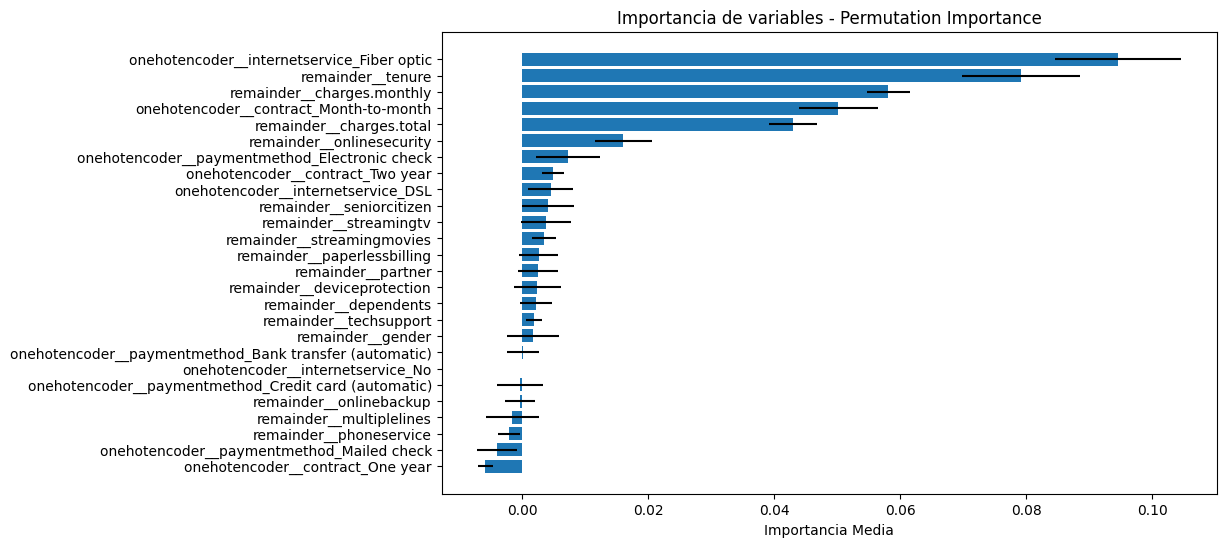

In [40]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

# Asegúrate de tener un conjunto de test separado
x_train_split, X_test_split, y_train_split, y_test_split = train_test_split(x_train, y_train, test_size=0.3, random_state=42)

# Entrenar el modelo
modelo = DecisionTreeClassifier()
modelo.fit(x_train_split, y_train_split)

# Calcular importancia por permutación
resultado = permutation_importance(modelo, X_test_split, y_test_split, n_repeats=10, random_state=42)

# Crear DataFrame
perm_df = pd.DataFrame({
    'Variable': X_test_split.columns,
    'Importancia Media': resultado.importances_mean,
    'Desviación': resultado.importances_std
}).sort_values(by='Importancia Media', ascending=False)

# Mostrar resultados
print(perm_df)

# Gráfico
plt.figure(figsize=(10, 6))
plt.barh(perm_df['Variable'], perm_df['Importancia Media'], xerr=perm_df['Desviación'])
plt.gca().invert_yaxis()
plt.xlabel("Importancia Media")
plt.title("Importancia de variables - Permutation Importance")
plt.show()

**En el caso de los arboles de decision, las variables que mas peso tuvieron para la prediccion del modelo fue el tipo de servicio de fibra optica, y la estancia en tiempo del cliente, y como tercera mas importante fue el cargo mensual en el servicio.**

